In [70]:
import pandas as pd
%pylab inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [71]:
df = pd.read_csv("C:\\train.csv")

In [72]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [73]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [74]:
def base_rate_model(X):
 y = np.zeros(X.shape[0])
 return y

In [113]:
def getAccuracy(X,y):
    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model = LogisticRegression(penalty='l2',C=1)
    model.fit(X_train,y_train)
    logit_roc_auc = roc_auc_score(y_test,model.predict(X_test))
    accuracy=accuracy_score(y_test,model.predict(X_test))
    return accuracy,logit_roc_auc

In [114]:
columns=['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare']

In [115]:
categoricalColumns=['Sex','Cabin', 'Embarked']

In [122]:
import itertools

maxAccuracy=0.0
matchedColumn={}
matchedColumnAUC={}
combs = []

for i in xrange(1, len(columns)+1):
    els = [list(x) for x in itertools.combinations(columns, i)]
    for entry in els:
        combs.append(entry)
'''print combs'''

for columnCombi in combs:
    if not isinstance( columnCombi, int ):
        '''print columnCombi
        print "\n"'''
        X=pd.DataFrame()
        for entry in columnCombi:
            X[entry]=df[entry]
            if entry in categoricalColumns:
                '''print entry'''
                X[entry] = X[entry].astype('category')
        '''print X.dtypes'''
        X=X.dropna(axis=0)
        cat_columns = X.select_dtypes(['category']).columns
        X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
        '''print X'''
        
        X['survived']=df['Survived']
        y=X['survived']
        X=X.drop(['survived'],axis=1)
        accuracy,logit_roc_auc=getAccuracy(X,y)
        
        '''print "accuracy %f \n" % accuracy'''
        str=', '.join(columnCombi)
        matchedColumn[str]=accuracy
        matchedColumnAUC[str]=logit_roc_auc
        if maxAccuracy  < accuracy:
            MaxX=X
            maxAccuracy=accuracy
import operator
sorted_x = sorted(matchedColumn.items(), key=operator.itemgetter(1), reverse=True)
sorted_auc = sorted(matchedColumnAUC.items(), key=operator.itemgetter(1), reverse=True)

In [124]:
print "max auc columns,auc : "
print sorted_auc[0]
print "accuracy columns,auc : "
print matchedColumn[sorted_auc[0][0]]

max auc columns,auc : 
('Pclass, Sex, SibSp, Parch, Cabin', 0.8833333333333333)
accuracy columns,auc : 
0.829268292683


In [125]:
X=pd.DataFrame()
X['Pclass']=df['Pclass']
X['Sex']=df['Sex']
X['SibSp']=df['SibSp']
X['Parch']=df['Parch']
X['Cabin']=df['Cabin']
X['survived']=df['Survived']
X=X.dropna(axis=0)
X['Cabin'] = X['Cabin'].astype('category')
X['Sex'] = X['Sex'].astype('category')
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
y=X['survived']
X=X.drop(['survived'],axis=1)
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression(penalty='l2',C=1)
model.fit(X_train,y_train)
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))
y_base_rate=base_rate_model(X_test)
print "Base rate accuracy is %2.2f" % accuracy_score(y_test,y_base_rate)

Logistic accuracy is 0.83
Base rate accuracy is 0.27


In [128]:
print "...Base model..."
base_roc_auc = roc_auc_score(y_test,base_rate_model(X_test))
print "Base rate AUC %2.2f" % base_roc_auc
print classification_report(y_test,base_rate_model(X_test))
print "\n\n...Logistic Model..."
logit_roc_auc = roc_auc_score(y_test,model.predict(X_test))
print "Logstic AUC %2.2f" % logit_roc_auc
print classification_report(y_test,model.predict(X_test))

...Base model...
Base rate AUC 0.50
             precision    recall  f1-score   support

          0       0.27      1.00      0.42        11
          1       0.00      0.00      0.00        30

avg / total       0.07      0.27      0.11        41



...Logistic Model...
Logstic AUC 0.88
             precision    recall  f1-score   support

          0       0.61      1.00      0.76        11
          1       1.00      0.77      0.87        30

avg / total       0.90      0.83      0.84        41



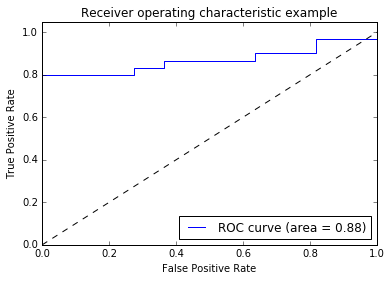

In [129]:
# Plot of a ROC curve for a specific class
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()